# Load data 

In [62]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from parse_logs import parser

# parser.root_data_path = '../data'
parser.root_data_path = '../tests/data'

# load trials run to dict (it can take a while)
#trial_run_objects = parser.get_trial_runs(
#    exp_run_code='experiment_2021_07_09_10_03_24_run_dummy')

trial_run_objects = parser.get_trial_runs(
    exp_run_code='experiment_2021_04_01_16_20_00_run_1')

trial_run_dicts = [trial_run.to_dict() for trial_run in trial_run_objects]

In [63]:
# sort and instantiate a dataframe
trial_run_dicts.sort(key=lambda tr: tr['trial_id'])
trial_run_dicts

trial_run_df = pd.DataFrame.from_records(trial_run_dicts)
trial_run_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge
0,1,aab,lab-02,baseline,399.566667,None,reach-target,483.507027,False,a,a
1,1,aap,lab-02,planned,398.166667,None,reach-target,475.496615,False,a,a
2,1,aab,lab-01,baseline,NaN,None,timeout,900.808468,True,a,a
3,1,aap,lab-01,planned,NaN,None,timeout,900.808468,True,a,a
4,2,abb,lab-02,baseline,505.266667,None,reach-target,619.646724,False,a,b
5,2,abp,lab-02,planned,394.016667,None,reach-target,480.507143,False,a,b
6,2,abb,lab-01,baseline,NaN,None,timeout,900.808468,True,a,b
7,2,abp,lab-01,planned,NaN,None,timeout,900.808468,True,a,b


## Baseline

In [3]:
baseline_df = trial_run_df[trial_run_df.treatment == 'baseline']
baseline_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge
0,1,aab,lab-02,baseline,399.566667,None,reach-target,483.507027,False,a,a
2,1,aab,lab-01,baseline,NaN,None,timeout,900.808468,True,a,a
4,2,abb,lab-02,baseline,505.266667,None,reach-target,619.646724,False,a,b
6,2,abb,lab-01,baseline,NaN,None,timeout,900.808468,True,a,b


# Planned

In [4]:
planned_df = trial_run_df[trial_run_df.treatment == 'planned']
planned_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge
1,1,aap,lab-02,planned,398.166667,None,reach-target,475.496615,False,a,a
3,1,aap,lab-01,planned,NaN,None,timeout,900.808468,True,a,a
5,2,abp,lab-02,planned,394.016667,None,reach-target,480.507143,False,a,b
7,2,abp,lab-01,planned,NaN,None,timeout,900.808468,True,a,b


In [5]:
# Average TCC

planned_ttc_avg = planned_df['ttc'].mean()
planned_ttc_avg

396.0916666985

In [6]:
# by machine (no trial run dummy aparece o mesmo porque a pasta foi copiada)
(planned_df[planned_df.machine == 'les-01']['ttc'].mean(),
planned_df[planned_df.machine == 'les-02']['ttc'].mean(),
planned_df[planned_df.machine == 'les-03']['ttc'].mean())


(nan, nan, nan)

In [7]:
# comparing factors (no dummy os fatores não foram distinguidos, porque teria que renomear os arquivos)
(planned_df[planned_df.factors_battery_charge == 'x']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'x']['ttc'].mean())

(nan, nan)

# Statistics

## Number of each event
i.e. how many times did the simulation achieve each status

In [8]:
# baseline_nums = [{col: None for col in baseline_df} for _ in range(num_experiments)]
# for col in baseline_df:
#     for i in range(num_experiments):
#         try:
#             baseline_nums[i][col] = len(baseline_df.loc[i][col])
#         except TypeError:
#             baseline_nums[i][col] = 0

by_end_state = trial_run_df.groupby(['end_state', 'treatment'])['end_state']
by_end_state.count()
# planned_by_end_state_df = planned_df.groupby('end_state')['end_state'].count()
# pd.merge(baseline_by_end_state_df, planned_by_end_state_df, on='end_state')

end_state     treatment
reach-target  baseline     2
              planned      2
timeout       baseline     2
              planned      2
Name: end_state, dtype: int64

In [9]:
trial_run_df.groupby(['trial_id', 'code', 'treatment'])['end_state'].value_counts()

trial_id  code  treatment  end_state   
1         aab   baseline   reach-target    1
                           timeout         1
          aap   planned    reach-target    1
                           timeout         1
2         abb   baseline   reach-target    1
                           timeout         1
          abp   planned    reach-target    1
                           timeout         1
Name: end_state, dtype: int64

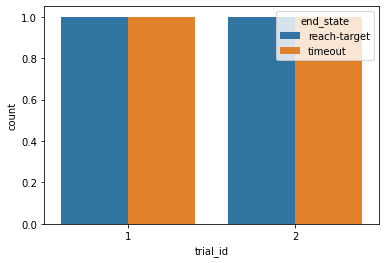

In [117]:
planned_run_df = trial_run_df[trial_run_df["treatment"] == "planned"]
ax_planned = sns.countplot(x='trial_id', hue="end_state", data=planned_run_df)

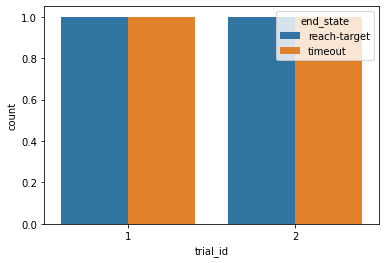

In [118]:
baseline_run_df = trial_run_df[trial_run_df["treatment"] == "baseline"]
ax_baseline = sns.countplot(x='trial_id', hue="end_state", data=baseline_run_df)

## Time to Conclusion

<AxesSubplot:xlabel='trial_id', ylabel='ttc'>

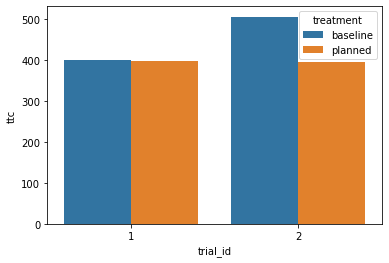

In [88]:
sns.barplot(x='trial_id', y='ttc', hue='treatment', data=trial_run_df, estimator=np.mean)

## STD

In [58]:
by_end_state_avg = trial_run_df.groupby(['end_state', 'treatment'])['ttc']
by_end_state_avg.std()

end_state     treatment
reach-target  baseline     74.741187
              planned       2.934493
timeout       baseline           NaN
              planned            NaN
Name: ttc, dtype: float64

# Plots

## Successes per trial

<AxesSubplot:xlabel='trial_id', ylabel='count'>

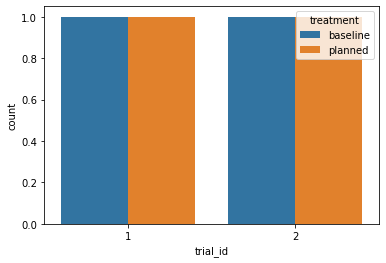

In [95]:
sns.countplot(x='trial_id', hue="treatment", data=trial_run_df[trial_run_df["end_state"] == "reach-target"])

### Average time to reach target

In [ ]:
_, ax = plt.subplots()
time["Planned Average Time"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="blue", legend=True)
time["Baseline Average Time"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="orange", legend=True)

In [ ]:
time.plot.bar(figsize=(16, 8))

# Metrics
## Metric1 - Success

In [159]:
metric1 = {"Metric 1": [planned_suc/baseline_suc for planned_suc, baseline_suc in 
                        zip(planned_df.groupby("end_state")["trial_id"].value_counts()["reach-target"],
                            baseline_df.groupby("end_state")["trial_id"].value_counts()["reach-target"])]}
metric1 = pd.DataFrame(metric1)
metric1

,Metric 1
0,1.0
1,1.0


<AxesSubplot:>

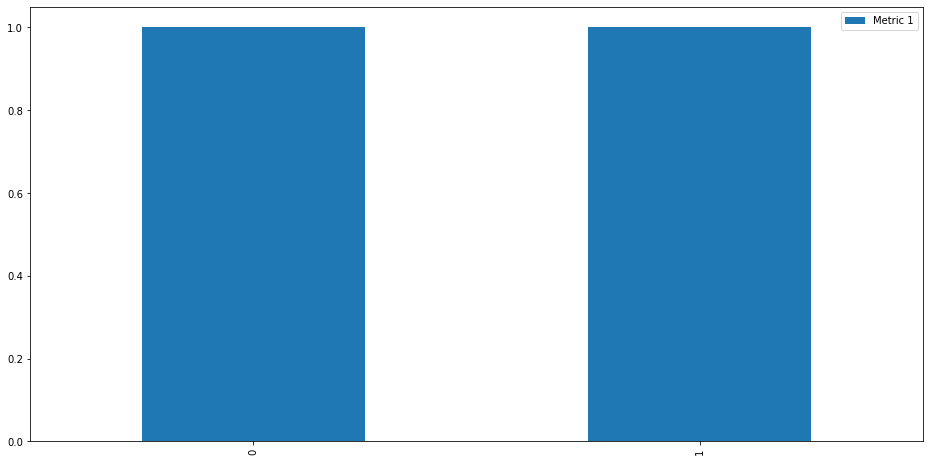

In [160]:
metric1.plot.bar(figsize=(16, 8))

## Metric2 - TTC

In [161]:
metric2 = {"Metric 2": [planned_ttc/baseline_ttc for planned_ttc, baseline_ttc in 
                        zip(planned_df.groupby("end_state")["ttc"].value_counts()["reach-target"],
                            baseline_df.groupby("end_state")["ttc"].value_counts()["reach-target"])]}
metric2 = pd.DataFrame(metric2)
metric2

,Metric 2
0,1.0
1,1.0


<AxesSubplot:>

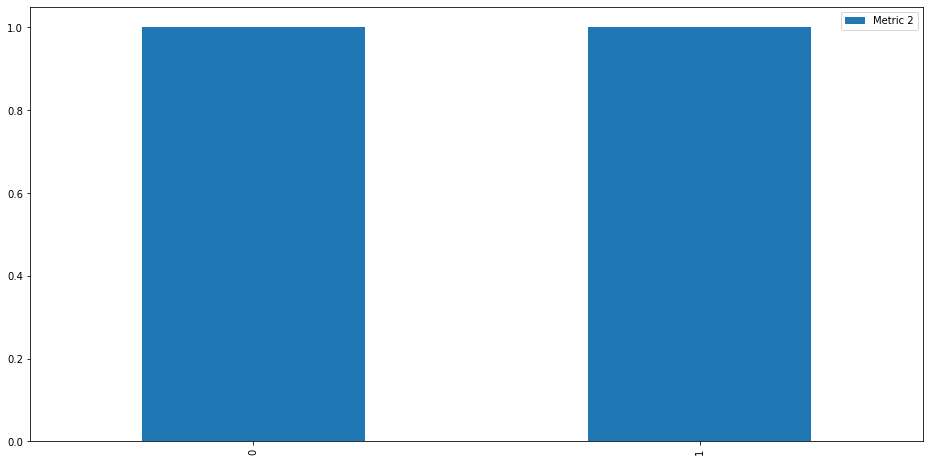

In [162]:
metric2.plot.bar(figsize=(16, 8))